In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
# valid_ndcgs = np.load("valid_ndcgs.npy")
# test_ndcgs = np.load("test_ndcgs.npy")
valid_ndcgs = np.load("valid_ndcgs_sgd.npy")
test_ndcgs = np.load("test_ndcgs_sgd.npy")

In [7]:
valid_ndcgs.shape

(162, 6040)

In [8]:
valid_ndcgs_tp = np.transpose(valid_ndcgs)
test_ndcgs_tp = np.transpose(test_ndcgs)

In [9]:
valid_ndcgs_tp.shape

(6040, 162)

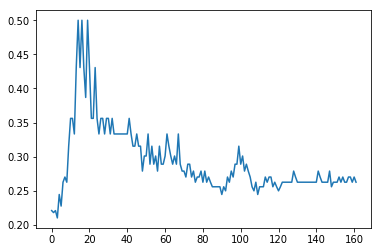

In [70]:
# user_range= range(0,20)
user_range= [0]
for i in user_range:
    sns.lineplot(x=range(valid_ndcgs_tp.shape[1]),y=valid_ndcgs_tp[i].tolist())
# sns.lineplot(x=range(200),y=valid_ndcgs_tp[1].tolist())

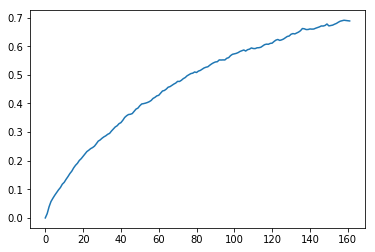

In [71]:
for i in user_range:
    sns.lineplot(x=range(user_scale.shape[1]),y=user_scale[i].tolist())

In [25]:
user_scale = np.transpose(np.load("user_scale.npy"))
item_scale = np.transpose(np.load("item_scale.npy"))

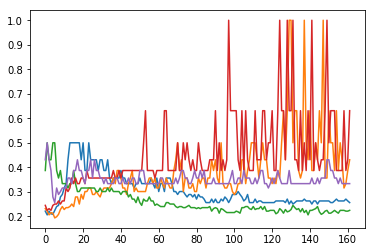

In [14]:
for i in user_range:
    sns.lineplot(x=range(valid_ndcgs_tp.shape[1]),y=test_ndcgs_tp[i].tolist())

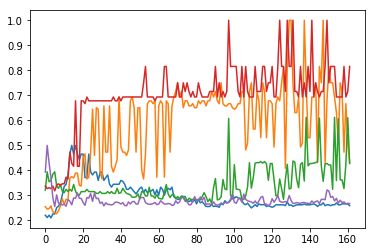

In [15]:
for i in user_range:
    sns.lineplot(x=range(valid_ndcgs_tp.shape[1]),y=((test_ndcgs_tp[i]+valid_ndcgs_tp[i])/2).tolist())

In [16]:
mean_ndcgs=(test_ndcgs_tp+valid_ndcgs_tp)/2

In [17]:
mean_ndcgs_maxindex = np.argmax(mean_ndcgs,axis=1)

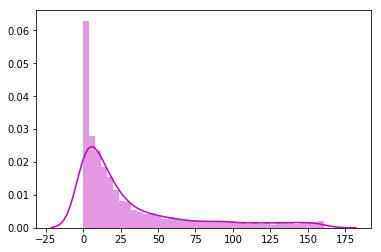

In [18]:
sns.distplot(np.argmax(test_ndcgs_tp,axis=1),color="m")

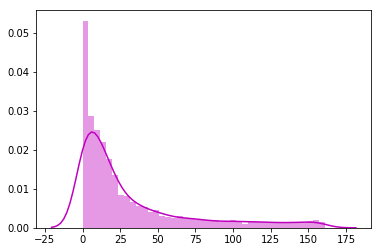

In [19]:
sns.distplot(np.argmax(valid_ndcgs_tp,axis=1),color="m")

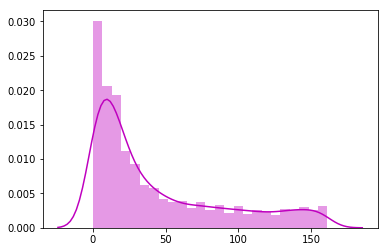

In [20]:
sns.distplot(mean_ndcgs_maxindex,color="m")

In [96]:
import scipy.sparse as sp
def load_rating_file_as_matrix(filename):
    '''
    Read .rating file and Return dok matrix.
    The first line of .rating file is: num_users\t num_items
    '''
    # Get number of users and items
    num_users, num_items = 0, 0
    with open(filename, "r") as f:
        line = f.readline()
        while line != None and line != "":
            arr = line.split("\t")
            u, i = int(arr[0]), int(arr[1])
            num_users = max(num_users, u)
            num_items = max(num_items, i)
            line = f.readline()
    # Construct matrix
#     mat = sp.dok_matrix((num_users + 1, num_items + 1), dtype=np.float32)
    nnz_list = np.zeros(6040,dtype=int)
    # self.num_users = num_users+1
    # self.num_items = num_items+1
    with open(filename, "r") as f:
        line = f.readline()
        while line != None and line != "":
            arr = line.split("\t")
            user, item = int(arr[0]), int(arr[1])
#             mat[user, item] = 1.0
            nnz_list[user] +=1
            line = f.readline()
    return nnz_list
nnz_list = load_rating_file_as_matrix("../Data/movielens1m-paper.train.rating")

In [98]:
nnz_list[:10]

array([ 51, 127,  49,  19, 196,  69,  29, 137, 104, 399])

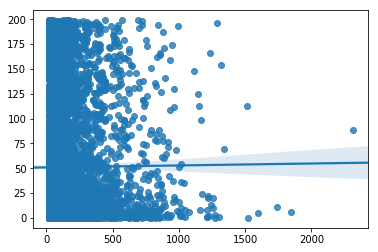

In [146]:
sns.regplot(x=nnz_list,y=mean_ndcgs_maxindex)

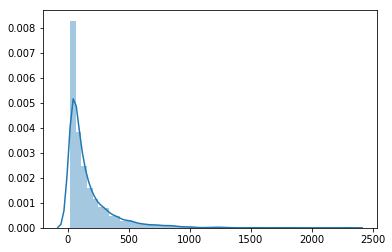

In [147]:
sns.distplot(nnz_list)

In [148]:
mean_ndcgs_maxindex[:10]

array([ 15,  85,  43, 133,   1,  10,  92, 124,   6, 160])

In [149]:
nnz_list[:10]

array([ 51, 127,  49,  19, 196,  69,  29, 137, 104, 399])